In [1]:
import numpy as np
import pandas  as pd
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import iplot


%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import pickle
import streamlit as st
from streamlit_option_menu import option_menu

Importing the data set

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


visulaze the dataset

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


see the first 5rows and 5columns in dataset

In [6]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


see the last 5rows and 5columns in dataset

In [7]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


shape of data

In [8]:
df.shape

(918, 12)

size of fdata set

In [9]:
df.size

11016

columns in data set

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

information about dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Note: We can see that our data has 918 rows and 12 columns. Sex,ChestPainType,RestingECG, ExerciseAngina, and ST_Slope are object time means that are ordinal categorical data others are numbers and our target variable is HeartDisease.

describe about dataset

The describe() method in Pandas is used to get a quick statistical summary of a DataFrame. It calculates several summary statistics for each column in the DataFrame, including the count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value.

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Age: Maximum age is 77 and the minimum age is 28, the mean is 53.51 and 75 percent of the age is below 60. 
RestingBP: Maximum value of RestingBP is 200 and the minimum is 0 and 75 percent of the Bp is below 140. Cholesterol: Maximum value of Cholesterol is 603 and the minimum is 0 and 75 percent of the Cholesterol is below 267. FastingBS: Maximum value of FastingBSis is 1 and the minimum is 0 and 75 percent of the FastingBS is below 0. MaxHR: Maximum value of MaxHR is 202 and the minimum is 60 and 75 percent of the MaxHR is below 156. Oldpeak: Maximum value of Oldpeak is 6.2 and the minimum is -2.6 and 75 percent of the Oldpeak is below 1.5.

checking the null values

In [13]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

duplicated() check the duplicate value

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

checking the duplicate

In [16]:
df.duplicated().sum()

0

checking the unique values

In [17]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

catagorical types in dataset

targert column 

In [18]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

diplay the number of male and female are affected

In [19]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [20]:
s=df.loc[df["Sex"] == 0 ]

In [21]:
s

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


types of chest pain

In [22]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [23]:
c=df.loc[df["ChestPainType"] == 0 ]

In [24]:
c

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


restingecg type

In [25]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [26]:
r=df.loc[df["RestingECG"] == 0 ]

In [27]:
r

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


types of exerciseagina

In [28]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [29]:
e=df.loc[df["ExerciseAngina"] == 0 ]

In [30]:
e

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


type of slope

In [31]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [32]:
s=df.loc[df["ST_Slope"] == 0 ]

In [33]:
s

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


checking the outlayers

age

<AxesSubplot:xlabel='Age'>

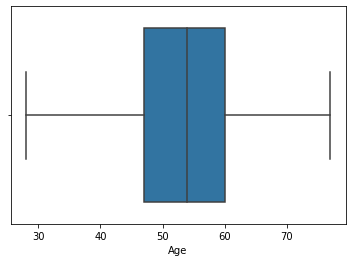

In [34]:
sns.boxplot(data=df, x='Age')

c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

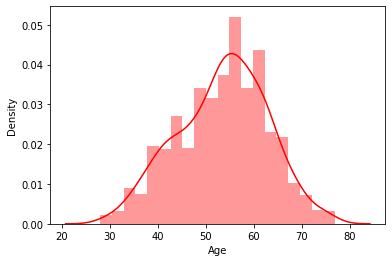

In [35]:
sns.distplot(df["Age"],bins=20,color='red')

restingbp

<AxesSubplot:xlabel='RestingBP'>

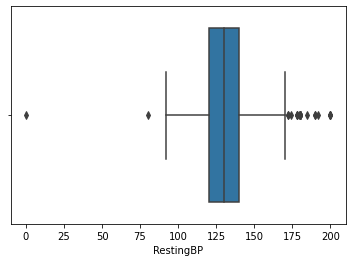

In [36]:
sns.boxplot(data=df, x='RestingBP')

c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

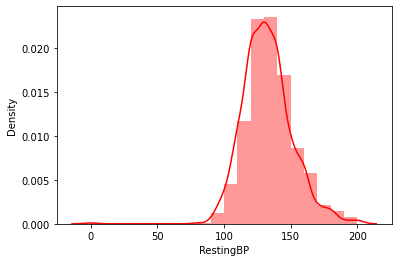

In [37]:
sns.distplot(df["RestingBP"],bins=20,color='red')

In [38]:
df.RestingBP.unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [39]:
df.RestingBP=df.RestingBP.replace(0,int(df.RestingBP.median()))

In [40]:
df.RestingBP.unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int64)

<AxesSubplot:xlabel='RestingBP'>

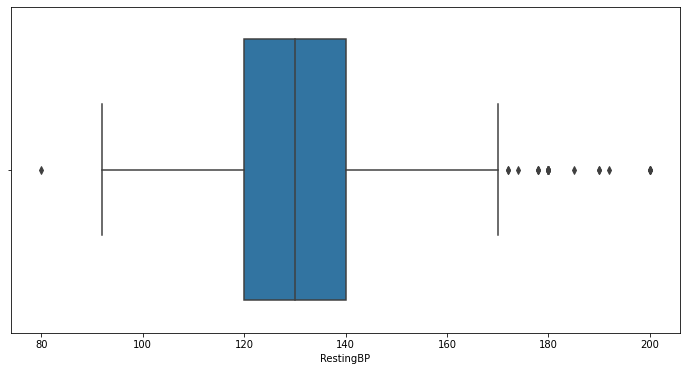

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='RestingBP')

c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

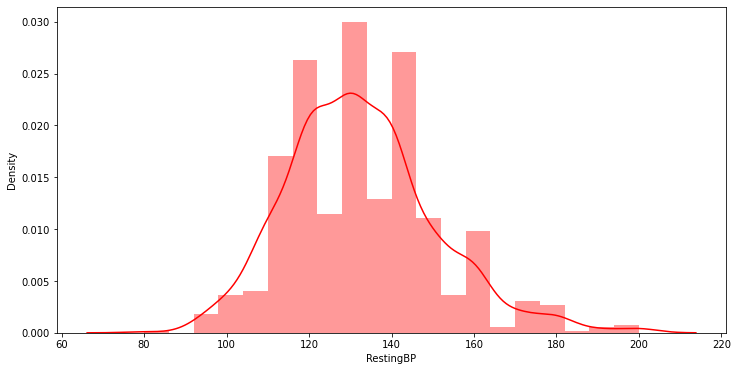

In [42]:
plt.figure(figsize=(12,6))
sns.distplot(df["RestingBP"],bins=20,color='red')

cholesterol

<AxesSubplot:xlabel='Cholesterol'>

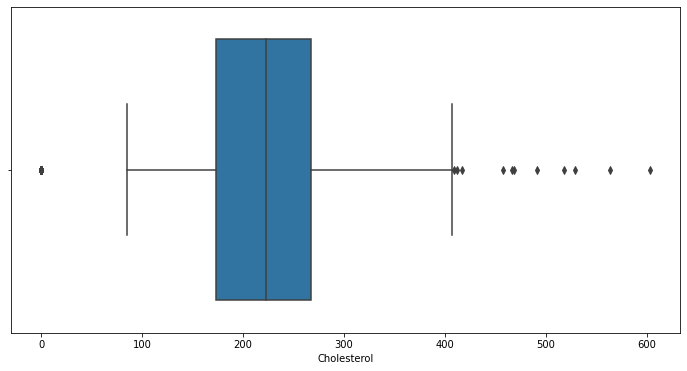

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Cholesterol')

c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

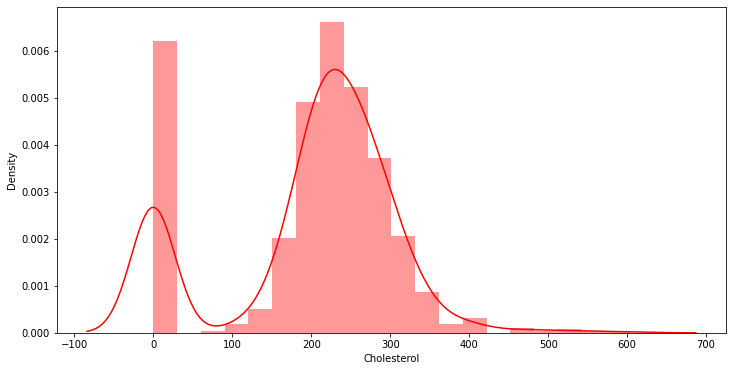

In [44]:
plt.figure(figsize=(12,6))
sns.distplot(df["Cholesterol"],bins=20,color='red')

In [45]:
df.Cholesterol.unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [46]:
out= df.loc[df["Cholesterol"] == 0 ]

In [47]:
out

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [48]:
df.Cholesterol=df.Cholesterol.replace(0,int(df.Cholesterol.mean()))

In [49]:
df.Cholesterol.unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

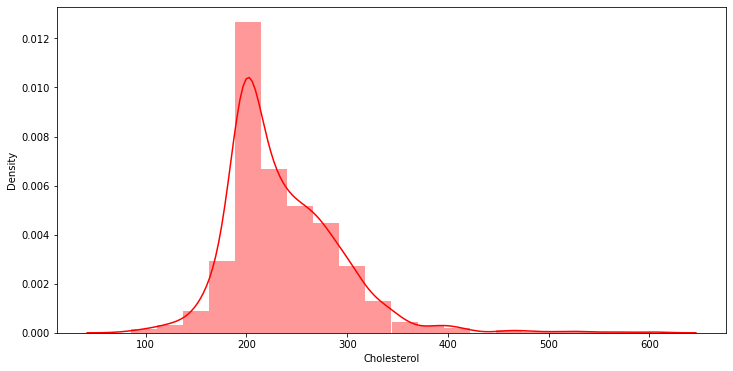

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(df["Cholesterol"],bins=20,color='red')

Below 150 mg/dL	Below 1.7 mmol/L	Desirable
150-199 mg/dL	1.7-2.2 mmol/L	Borderline high
200-499 mg/dL	2.3-5.6 mmol/L	High
500 mg/dL and above	Above 5.6 mmol/L	Very high

Below 150 mg/dL	Below 1.7 mmol/L	Desirable
150-199 mg/dL	1.7-2.2 mmol/L	Borderline high
200-499 mg/dL	2.3-5.6 mmol/L	High
500 mg/dL and above	Above 5.6 mmol/L	Very high

<AxesSubplot:xlabel='Cholesterol'>

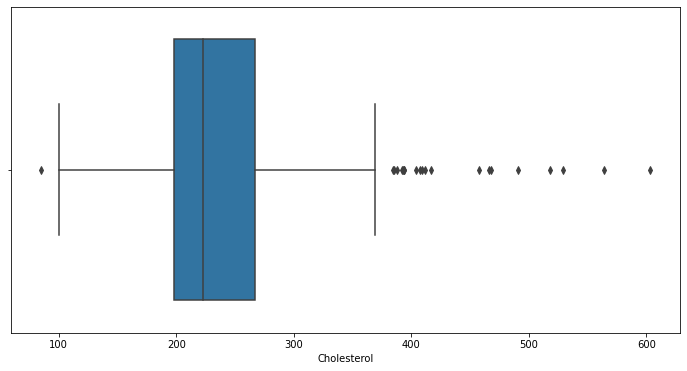

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Cholesterol')


In [52]:
cholo= df.loc[df["Cholesterol"] >= 400 ]

In [53]:
cholo

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


outlayers in maxhr

A low resting heart rate in the 30s, for example, means the required oxygen isn't getting to the brain. This can make shortness of breath, fainting, and lightheadedness a possibility. For those with symptoms, visit your physician to explore the situation more in-depth

<AxesSubplot:xlabel='MaxHR'>

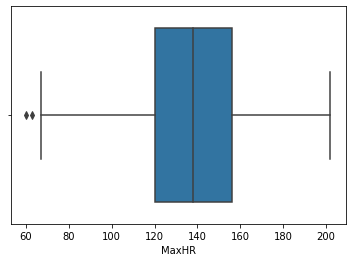

In [54]:
sns.boxplot(data=df, x='MaxHR')

c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

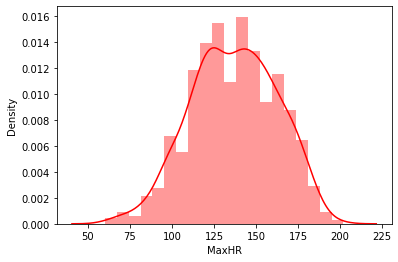

In [55]:
sns.distplot(df["MaxHR"],bins=20,color='red')

outlayers Oldpeak 

<AxesSubplot:xlabel='Oldpeak'>

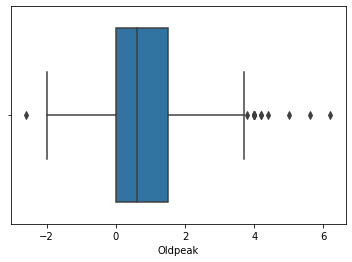

In [56]:
sns.boxplot(data=df, x='Oldpeak')

#Eda

heart disease

In [57]:
fig=px.pie(df,names=['Positive','Negative'],values=df['HeartDisease'].value_counts(),hole=0.5,
           title="<b>Precentage of Positive and Negative ",template='plotly',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_font_size=25)
fig.show()

In [58]:
for col in discrete_cols:
    fig = px.histogram(df, x=col, color='HeartDisease', barmode='group', 
                  text_auto=True, color_discrete_map={0: 'green', 1: 'darkred'})

    fig.update_layout(title_text='Count Plot of Heart Disease by {}'.format(col), xaxis_title=col, yaxis_title='Count')
    fig.show()

NameError: name 'discrete_cols' is not defined

<AxesSubplot:>

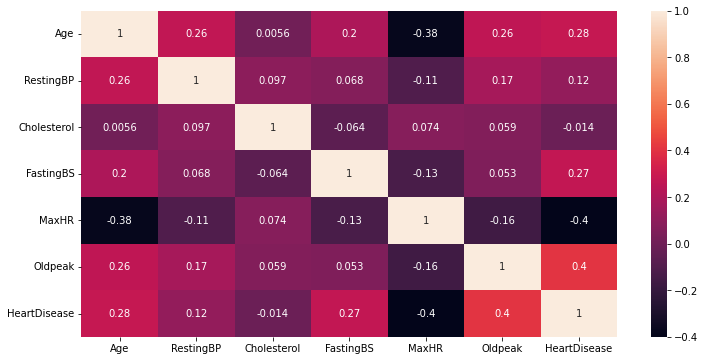

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

Age

(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

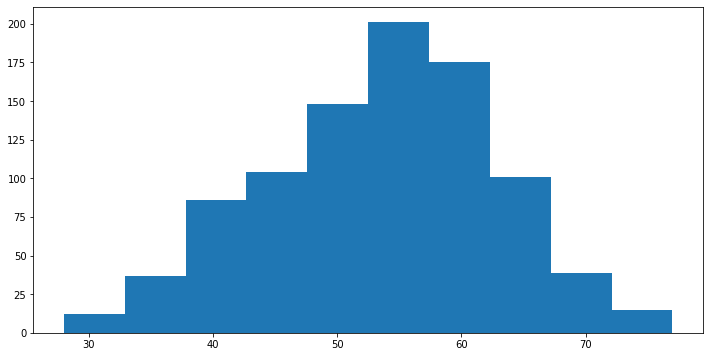

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df.Age)

<AxesSubplot:xlabel='Age', ylabel='count'>

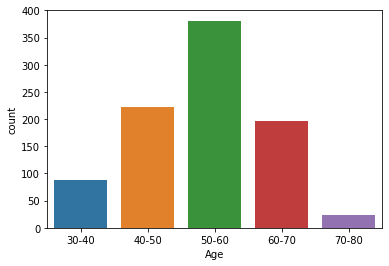

In [ ]:
Age_bins=pd.cut(df["Age"],bins=[30,40,50,60,70,80],
                    labels=["30-40","40-50","50-60","60-70","70-80"])
sns.countplot(x=Age_bins)

<AxesSubplot:xlabel='Age', ylabel='Count'>

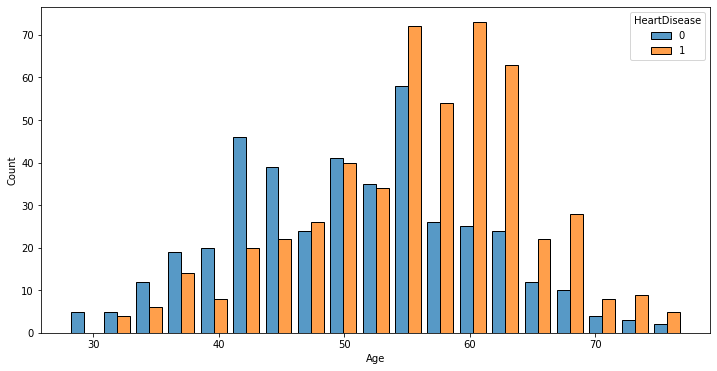

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Age", hue="HeartDisease", multiple="dodge", shrink=.8)

splite the data 40 to 70

In [ ]:
fage = df.loc[(df["Age"] >= 40) & (df["Age"] <=70)]

In [ ]:
fage.count()

Age               814
Sex               814
ChestPainType     814
RestingBP         814
Cholesterol       814
FastingBS         814
RestingECG        814
MaxHR             814
ExerciseAngina    814
Oldpeak           814
ST_Slope          814
HeartDisease      814
dtype: int64

Effect of Blood Pressure on Age
normal blood pressure is 80 to 120

In [ ]:
plt.figure(figsize=(12,6))
px.scatter(df,x='Age',y='RestingBP',color='HeartDisease',size='RestingBP',labels={'RestingBP':'BloodPressure'},
           template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.RdBu,title='Age Vs BloodPressure')

<Figure size 864x432 with 0 Axes>

Effect of Heart Rate on Age

A normal resting heart rate for adults ranges from 60 to 100 beats per minute. Generally, a lower heart rate at rest implies more efficient heart function and better cardiovascular fitness


A normal blood pressure level is less than 120/80 mmHg. No matter your age, you can take steps each day to keep your blood pressure in a healthy range

In [ ]:
px.scatter(df,x='Age',y='MaxHR',color='Sex',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate','Sex':'sex'},
           template='plotly_dark',opacity=0.8,color_discrete_map={'F':'orange','M':'red'},title='Age Vs HeartRate')

In [ ]:
ghr = df.loc[df["MaxHR"] >= 100 ]

In [ ]:
ghr.count()

Age               847
Sex               847
ChestPainType     847
RestingBP         847
Cholesterol       847
FastingBS         847
RestingECG        847
MaxHR             847
ExerciseAngina    847
Oldpeak           847
ST_Slope          847
HeartDisease      847
dtype: int64

age vs fasstingbs

<AxesSubplot:xlabel='Age', ylabel='Count'>

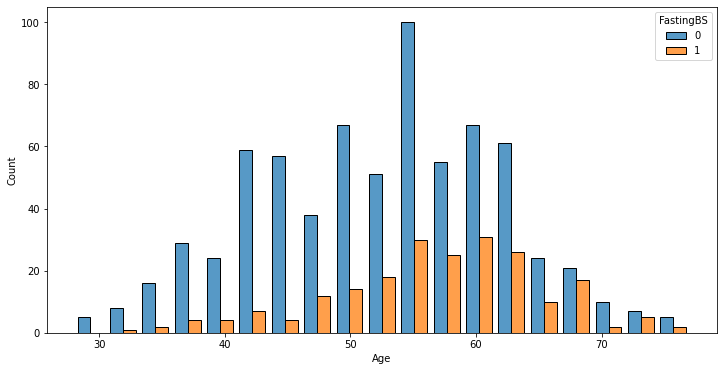

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Age", hue="FastingBS", multiple="dodge", shrink=.8,)


gender

(array([725.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

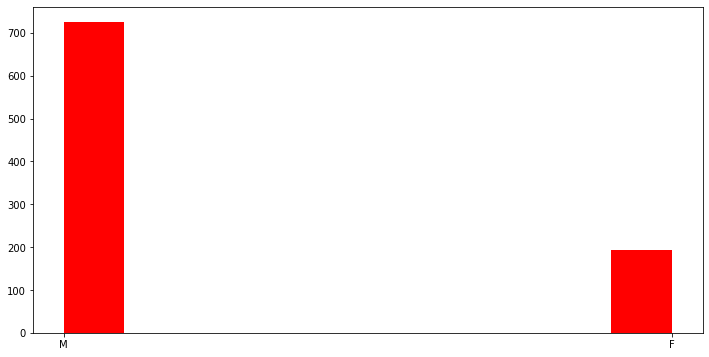

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df.Sex,color="red")


In [ ]:
fig=px.pie(df,names=['male','female'],values=df['Sex'].value_counts(),hole=0.5,
           title="<b>Precentage of male and female ",template='plotly',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_font_size=25)
fig.show()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

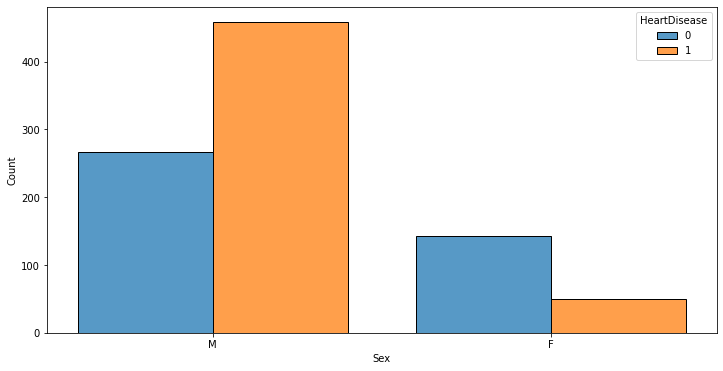

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Sex", hue="HeartDisease", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

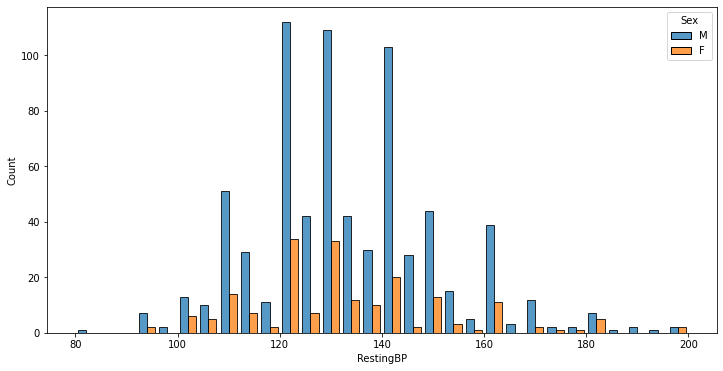

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="RestingBP", hue="Sex", multiple="dodge", shrink=.8)

chest pain


chestpaintype TA=TYPICAL ANGINA =0
              ATA=ATYPICAL ANGINA=1
              NPA=NON-ANGINA PAIN=2
              ASY=ASYMPTOMATIC=3

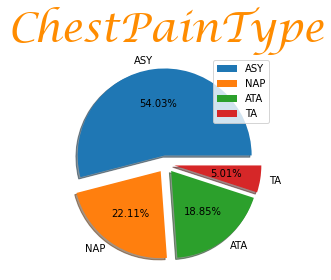

In [ ]:
ax=df['ChestPainType'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "ChestPainType", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.legend(labels=['ASY','NAP','ATA','TA'])
plt.axis('off');

In [ ]:
asy = df.loc[df["ChestPainType"] == 'ASY' ]


In [ ]:
asy.count()

Age               496
Sex               496
ChestPainType     496
RestingBP         496
Cholesterol       496
FastingBS         496
RestingECG        496
MaxHR             496
ExerciseAngina    496
Oldpeak           496
ST_Slope          496
HeartDisease      496
dtype: int64

c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



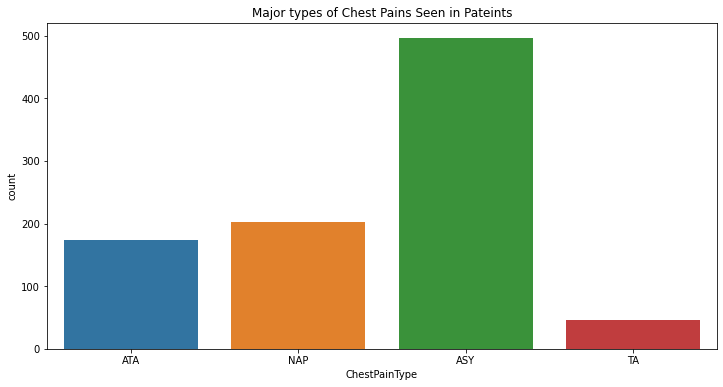

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['ChestPainType'])
plt.title('Major types of Chest Pains Seen in Pateints')
plt.show()

resting bp

In [ ]:
px.scatter(df,x='RestingBP',y='MaxHR',color='HeartDisease',size='MaxHR',
           labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},
           template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='BloodPressure Vs HeartRate')

In [ ]:
lbp =df.loc[(df["RestingBP"] <= 120) & (df["HeartDisease"] == 1)]

In [ ]:
lbp.count()

Age               142
Sex               142
ChestPainType     142
RestingBP         142
Cholesterol       142
FastingBS         142
RestingECG        142
MaxHR             142
ExerciseAngina    142
Oldpeak           142
ST_Slope          142
HeartDisease      142
dtype: int64

(array([  1.,  30., 116., 208., 236., 210.,  74.,  20.,  16.,   7.]),
 array([ 80.,  92., 104., 116., 128., 140., 152., 164., 176., 188., 200.]),
 <BarContainer object of 10 artists>)

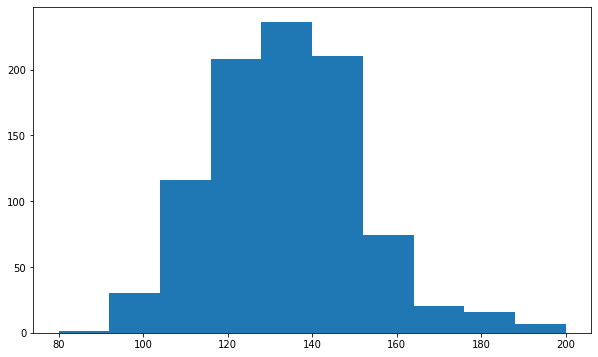

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["RestingBP"],bins=10)

In [ ]:
RestingBP_bins=pd.cut(df["RestingBP"],bins=[80,100,120,140,160,180,200],
                    labels=["80-100","100-120","120-140","140-160","160-180","180-200"])

<AxesSubplot:xlabel='RestingBP', ylabel='count'>

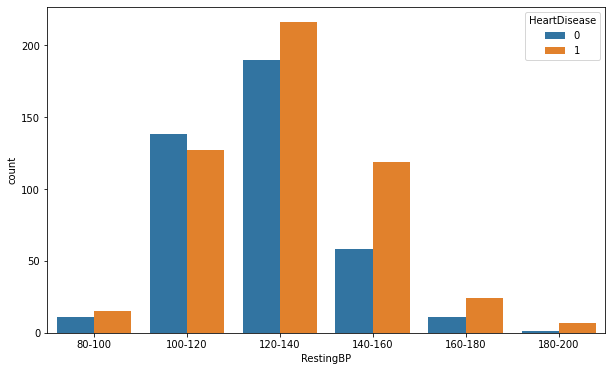

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=RestingBP_bins,hue=df["HeartDisease"])

Cholesterol       

In general: A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal

(array([ 12.,  91., 460., 229.,  96.,  17.,   5.,   4.,   2.,   2.]),
 array([ 85. , 136.8, 188.6, 240.4, 292.2, 344. , 395.8, 447.6, 499.4,
        551.2, 603. ]),
 <BarContainer object of 10 artists>)

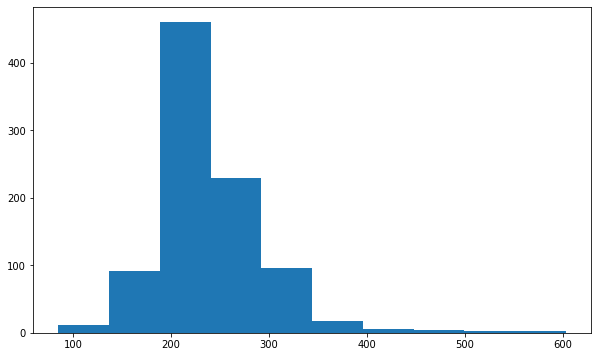

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df.Cholesterol)

In [ ]:
cholo_bins=pd.cut(df["Cholesterol"],bins=[100,200,300,400,500,600],
                    labels=["100-200","200-300","300-400","400-500","500-600",])

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

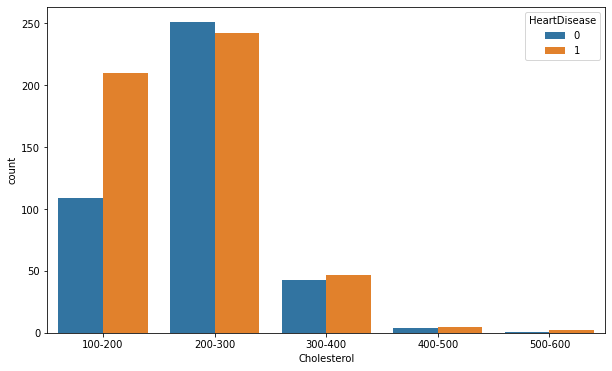

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=cholo_bins,hue=df["HeartDisease"])

In [ ]:
px.scatter(df,x='Cholesterol',y='Age',color='HeartDisease',size='Age',
           labels={'Cholesterol':'Cholesterol','Age':'Age'},
           template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='Age Vs cholesteral')

In [ ]:
ch = df.loc[df["Cholesterol"] == 200]


In [ ]:
ch

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
235,39,M,ATA,120,200,0,Normal,160,Y,1.0,Flat,0
258,51,F,NAP,150,200,0,Normal,120,N,0.5,Up,0
547,61,M,TA,142,200,1,ST,100,N,1.5,Down,1
649,50,M,ASY,144,200,0,LVH,126,Y,0.9,Flat,1


In [ ]:
gcho = df.loc[df["Cholesterol"] >= 200]


In [ ]:
gcho.count()

Age               600
Sex               600
ChestPainType     600
RestingBP         600
Cholesterol       600
FastingBS         600
RestingECG        600
MaxHR             600
ExerciseAngina    600
Oldpeak           600
ST_Slope          600
HeartDisease      600
dtype: int64

Fasting BS

(array([704.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

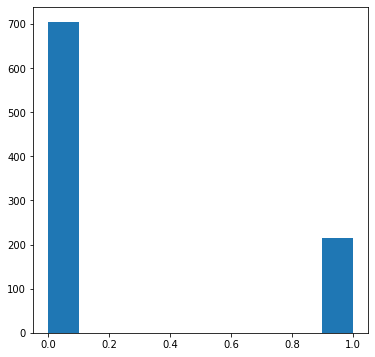

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(df["FastingBS"],bins=10)

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

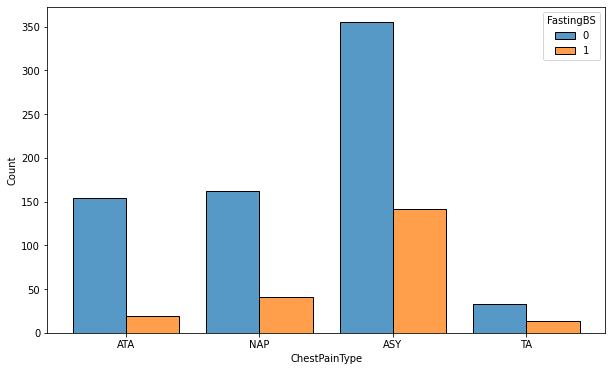

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="ChestPainType", hue="FastingBS", multiple="dodge", shrink=.8,)


Resting Ecg

normal = so ecg is normal
st = pqrst irregular blood curculation (impact depression)
lvh = left venticular hypertrophy [increase the size of lvh]

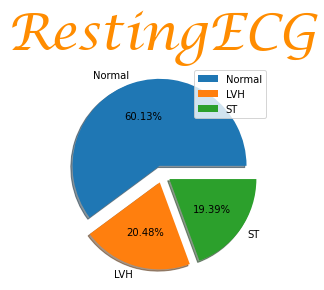

In [ ]:
ax=df['RestingECG'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "RestingECG", fontsize = 50,color='DarkOrange',font='Lucida Calligraphy')
plt.legend(labels=['Normal','LVH','ST'])
plt.axis('off');


c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



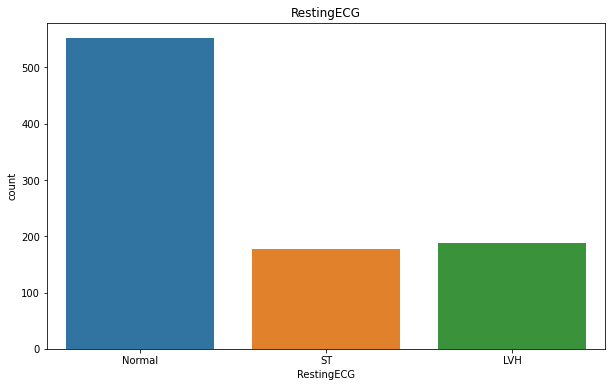

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['RestingECG'])
plt.title('RestingECG')
plt.show()

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

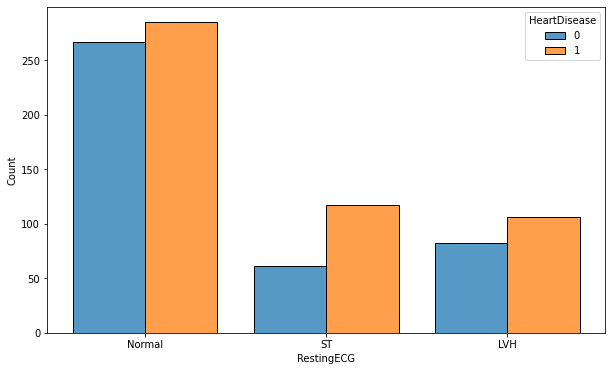

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="RestingECG", hue="HeartDisease", multiple="dodge", shrink=.8)

maxhr

(array([  9.,  18.,  62., 113., 192., 175., 148., 132.,  61.,   8.]),
 array([ 60. ,  74.2,  88.4, 102.6, 116.8, 131. , 145.2, 159.4, 173.6,
        187.8, 202. ]),
 <BarContainer object of 10 artists>)

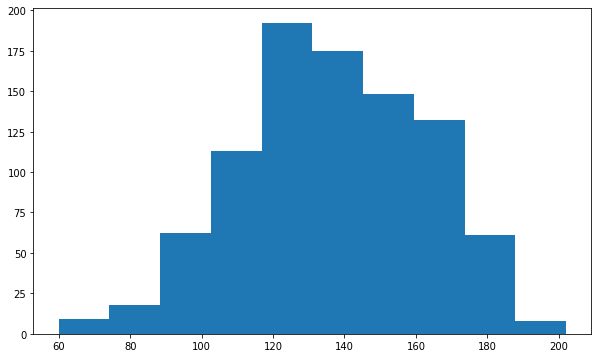

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df.MaxHR)

In [ ]:
hr_bins=pd.cut(df["MaxHR"],bins=[60,80,100,120,140,160,180,200],
                    labels=["60-80","80-100","100-120","120-140","140-160","160-180","180-200"])

<AxesSubplot:xlabel='MaxHR', ylabel='count'>

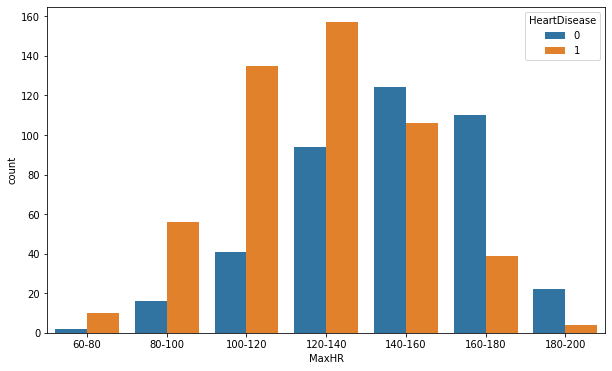

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=hr_bins,hue=df["HeartDisease"])

In [ ]:
px.scatter(df,x='Oldpeak',y='MaxHR',color='Oldpeak',size='MaxHR',labels={'Oldpeak':'Oldpeak','MaxHR':'HeartRate'},
           template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.RdBu,title='max hr Vs HeartRate')

excerise angina

EXERCISE ANGINA
TRUE-YES=1
FALSE-NO-0

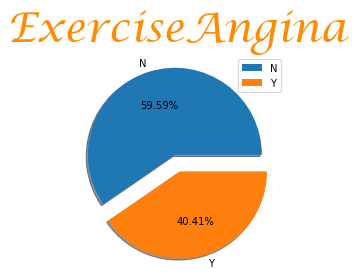

In [ ]:
ax=df['ExerciseAngina'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ExerciseAngina", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['N','Y'])
plt.axis('off');

<AxesSubplot:xlabel='Age', ylabel='Count'>

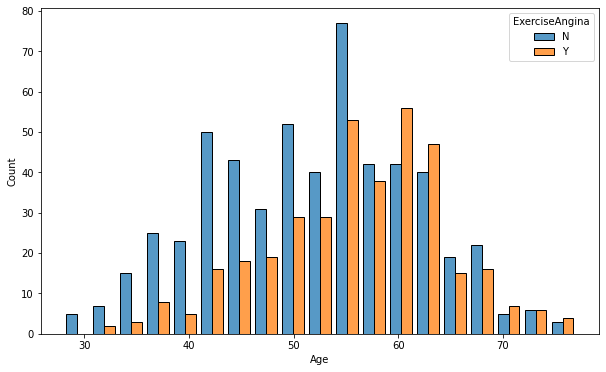

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="ExerciseAngina", multiple="dodge", shrink=.8,)


 old peack

(array([  2.,   5., 374., 118., 236., 119.,  44.,  17.,   1.,   2.]),
 array([-2.6 , -1.72, -0.84,  0.04,  0.92,  1.8 ,  2.68,  3.56,  4.44,
         5.32,  6.2 ]),
 <BarContainer object of 10 artists>)

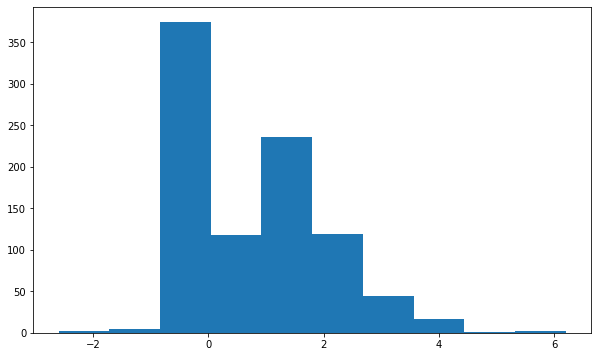

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df.Oldpeak)

In [ ]:
old_bins=pd.cut(df["Oldpeak"],bins=[-2,0,2,4,6,],
                    labels=["-2-0","0-2","2-4","4-6"])

<AxesSubplot:xlabel='Oldpeak', ylabel='count'>

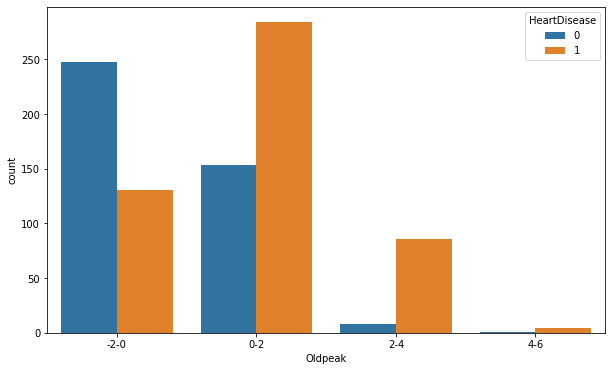

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=old_bins,hue=df["HeartDisease"])

In [ ]:
px.scatter(df,x='Oldpeak',y='Age',color='HeartDisease',size='MaxHR',
           template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='Oldpeak VS HeartDiaeases')

age st-slope

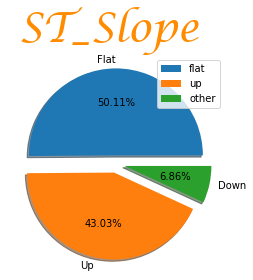

In [ ]:
ax=df['ST_Slope'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "ST_Slope ", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.legend(labels=['flat','up','other'])
plt.axis('off');



ST-SLOPE
DOWN=0
FLAT=1
UP=2

<AxesSubplot:xlabel='Age', ylabel='Count'>

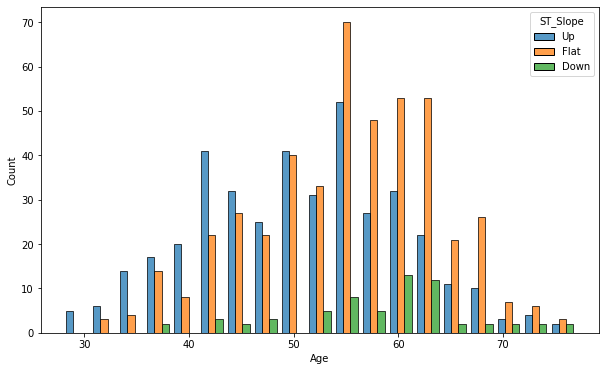

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="ST_Slope", multiple="dodge", shrink=.8,)


In [ ]:
px.scatter(df,x='MaxHR',y='Cholesterol',color='HeartDisease',size='MaxHR',labels={'ChestPainType':'ChestPainType','Cholesterol':'Cholesterol'},
           template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='Cholesterol VS HeartDiaeases')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
my_colors = [['darkred', '#8c1d40', '#c53e4f', '#ed6e54'], ['lightgreen', '#4c8d4f', '#7bbf6a', '#a7f5b5'], 
             ['deepskyblue', '#1c6e8c', '#3798b4', '#5cb5d2'], ['lightseagreen', '#3a8d83', '#4eb7a0', '#67e3c3'], 
             ['pink', '#8d3a59', '#c55b84', '#ed88aa']]


for i,col in enumerate(discrete_cols):
    temp = pd.DataFrame(df[col].value_counts()).reset_index()
    temp['Percentage'] = round((temp[col] / temp.iloc[:,1].sum())*100,2)
    
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=['Frequency Count', 'Percentage Ratio'])
    
    bar_chart = go.Bar(x=temp['index'], y=temp[col],name=col, text=temp[col],textposition='auto',
                      marker_color=my_colors[i][0],showlegend=False)
    
    pie_chart = go.Pie(labels=temp['index'],values=temp['Percentage'],hole=1/2,
                      marker=dict(colors=my_colors[i]))

    
    fig.add_trace(bar_chart, row=1, col=1)
    fig.add_trace(pie_chart, row=1, col=2)
    
    
    fig.update_layout(title_text="Column: "+col,height=400)
    fig.update_layout(title_text="Column: "+col,width=700)
    fig.show()

👉 According to above plots and tabel:

Male records are far more as compare to Female records.
More than 50% Chest Pain type is ASY.
Around 60% RestingECG is Normal.
Approx 60% doesn't have Exercise Agina.
50% of the ST_Slope is Flat.
Min Age is 28 and Max Age is 77, while the Avg. Age is between 50-60 years.
RestingBP is between 80 - 200
Max Heart Rate is 60 - 202

LABEL replacing
There are some features which are in object datatype, we have to convert those to numeric data. For that we have to use encoding. There are various methods for encoding categorical data, including one-hot encoding, label encoding, and target encoding. I used label encoding here.

In [59]:
df.replace({"Sex":{'M':1,'F':0}},inplace=True)


In [60]:
df.replace({"ChestPainType":{'TA':0,'ATA':1,'NAP':2,'ASY':3}},inplace=True)

In [61]:
df.replace({"RestingECG":{'Normal':0,'ST':1,'LVH':2}},inplace=True)

In [62]:
df.replace({"ExerciseAngina":{'N':0,'Y':1}},inplace=True)


In [63]:
df.replace({"ST_Slope":{'Down':0,'Flat':1,'Up':2}},inplace=True)

In [64]:
x = df.drop(columns='HeartDisease', axis=1 )
y = df['HeartDisease']

In [65]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,0,172,0,0.0,2
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,2
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,1
914,68,1,3,144,193,1,0,141,0,3.4,1
915,57,1,3,130,131,0,0,115,1,1.2,1
916,57,0,1,130,236,0,2,174,0,0.0,1


In [66]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=2)

In [68]:
print( x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(734, 11) (734,) (184, 11) (184,)


The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

Now let's try the Random Forest algorithm also, using the Scikit-learn implementation.

All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an ensemble of many Decision Trees.

One additional hyperparameter for Random Forest is called n_estimators which is the number of Decision Trees that make up the Random Forest.

In [69]:
forest= RandomForestClassifier(n_estimators =40, random_state = 0)

In [70]:
forest.fit(x_train,y_train) 

RandomForestClassifier(n_estimators=40, random_state=0)

In [71]:
print("Accuracy:",forest.score(x_test,y_test))

Accuracy: 0.842391304347826


In [72]:
y_pred = forest.predict(x_test)

In [73]:
mat=(confusion_matrix(y_test,y_pred))
mat

array([[74, 15],
       [14, 81]], dtype=int64)

<AxesSubplot:>

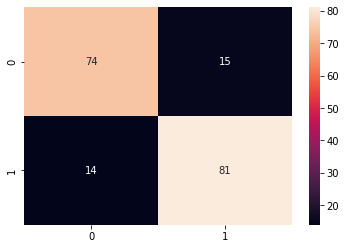

In [74]:
sns.heatmap(mat,annot=True)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        89
           1       0.84      0.85      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [76]:
mse = mean_squared_error(y_test, y_pred)


In [77]:
mse

0.15760869565217392

lable encoding

heartdata.replace({"Sex":{'M':1,'F':0}},inplace=True)
male=1,fema1e=0

heartdata.replace({"ChestPainType":{'TA':0,'ATA':1,'NAP':2,'ASY':3}},inplace=True)
RESTING ECG
NORMAL=NORMAL WAVE
ST=IRREGULAR BLOOD REGULATION(IMPACT DEPRESSION,ETC)
LVH=LEFT VENTICULAR HYPERTROPHY
heartdata.replace({"RestingECG":{'Normal':0,'ST':1,'LVH':2}},inplace=True)
EXERCISE ANGINA
TRUE-YES=1
FALSE-NO-0
heartdata.replace({"ExerciseAngina":{'N':0,'Y':1}},inplace=True)
ST-SLOPE
DOWN=0
FLAT=1
UP=2
heartdata.replace({"ST_Slope":{'Down':0,'Flat':1,'Up':2}},inplace=True)

In [78]:
input_data= (36,1,1,120,267,0,0,160,0,3,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = forest.predict(input_data_reshape)
print(prediction)


if (prediction[0]== 0):
    print('have not heart problem')
else:
    print('have problem')

[1]
have problem


c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [79]:
a = df.loc[df["Age"] == "X" ]

In [80]:
a

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
se = df.loc[df["Sex"] ==  "X"]

In [ ]:
se

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
cpc= df.loc[df["ChestPainType"] ==  "X"]

In [ ]:
cpc

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
rbs= df.loc[df["RestingBP"] ==  "X"]

In [ ]:
rbs

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
ch= df.loc[df["Cholesterol"] ==  "X"]

In [ ]:
ch

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
fbs= df.loc[df["FastingBS"] ==  "X"]

In [ ]:
fbs

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
ec= df.loc[df["RestingECG"] ==  "X"]

In [ ]:
ec

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
hr= df.loc[df["MaxHR"] ==  "X"]

In [ ]:
hr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
an= df.loc[df["ExerciseAngina"] ==  "X"]

In [ ]:
an

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
pe= df.loc[df["Oldpeak"] ==  "X"]

In [ ]:
pe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
sl= df.loc[df["ST_Slope"] ==  "X"]

In [ ]:
sl

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
Hsl= df.loc[df["HeartDisease"] ==  "X"]

In [ ]:
Hsl

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,2,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,2,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,2,0
5,39,1,2,120,339,0,0,170,0,0.0,2,0
6,45,0,1,130,237,0,0,170,0,0.0,2,0
7,54,1,1,110,208,0,0,142,0,0.0,2,0
8,37,1,3,140,207,0,0,130,1,1.5,1,1
9,48,0,1,120,284,0,0,120,0,0.0,2,0


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(forest, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data= (54,0,1,120,273,0,0,150,0,1.5,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshape)
print(prediction)


if (prediction[0]== 0):
    print('have not heart problem')
else:
    print('have problem')

[0]
have not heart problem


c:\Users\sarav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

